In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\sarad\OneDrive\spam.csv",encoding="latin-1")
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
print('shape of DS : \n', df1.shape,'\n', '-'*100, sep='')
print('Info of DS : \n',df1.info(),'\n', '-'*100, sep='' )
print('Description of DS : \n',df1.describe(),'\n', '-'*100, sep='' )

shape of DS : 
(5572, 5)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
Info of DS : 
None
----------------------------------------------------------------------------------------------------
Description of DS : 
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                      

In [4]:
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df1.rename(columns={'v1':'target','v2':'text'},inplace=True)
df1 = df1.drop_duplicates(keep='first')
encoder = LabelEncoder()
df1['target'] = encoder.fit_transform(df1['target'])
df1.head()

C:\Users\sarad\AppData\Local\Temp\ipykernel_12972\1207350404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = encoder.fit_transform(df1['target'])


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print(f'{df1.isnull().sum()}\nNum duplicates: {df1.duplicated().sum()}')
df1.shape

target    0
text      0
dtype: int64
Num duplicates: 0


(5169, 2)

0    4516
1     653
Name: target, dtype: int64


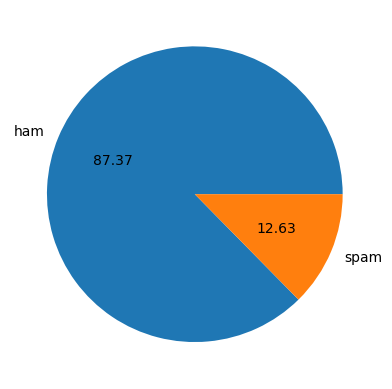

In [7]:
print(df1['target'].value_counts())
plt.pie(df1['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
import nltk
df1['num_characters'] = df1['text'].apply(len)
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df1.head()

C:\Users\sarad\AppData\Local\Temp\ipykernel_12972\1660888358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_characters'] = df1['text'].apply(len)
C:\Users\sarad\AppData\Local\Temp\ipykernel_12972\1660888358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\sarad\AppData\Local\Temp\ipykernel_12972\1660888358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [11]:
df1[df1['target'] == 1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


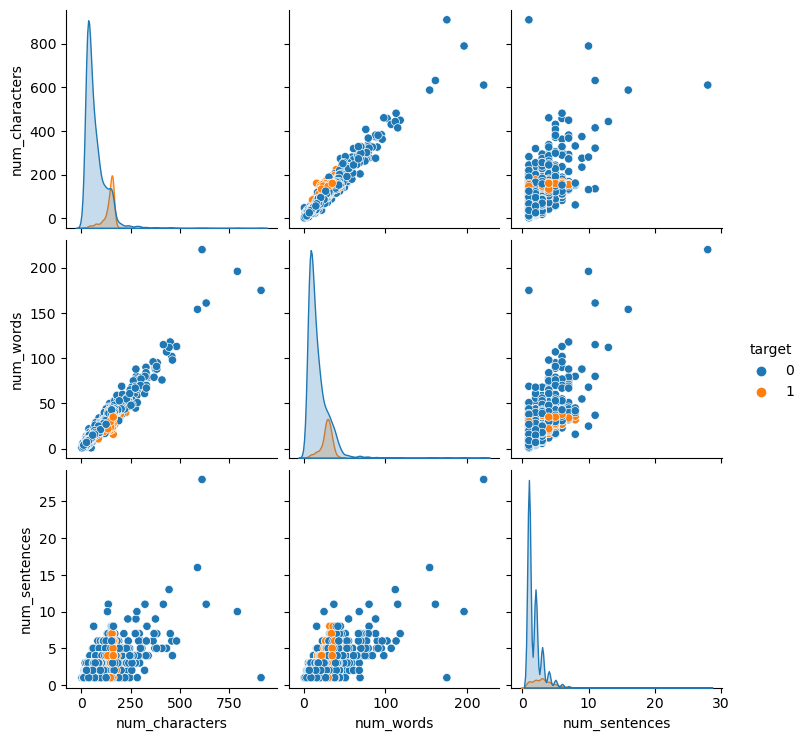

In [12]:
import seaborn as sns

sns.pairplot(df1,hue='target')

C:\Users\sarad\AppData\Local\Temp\ipykernel_12972\2815634915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df1.corr(), annot=True,cmap="coolwarm", center=0, ax=plt.subplots(figsize=(8,6))[1])


<Axes: >

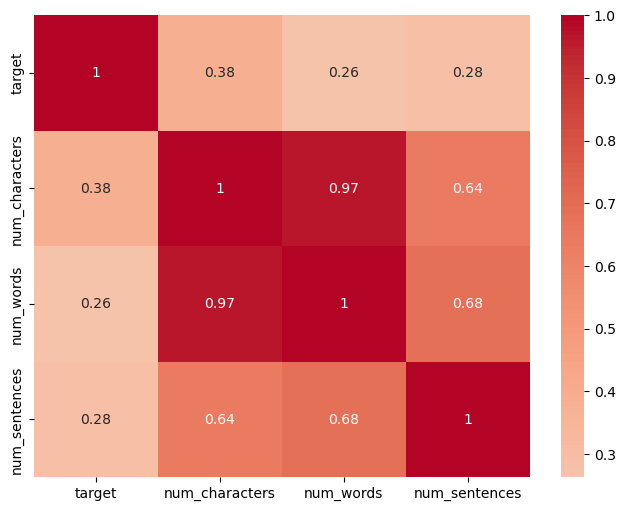

In [13]:
sns.heatmap(data=df1.corr(), annot=True,cmap="coolwarm", center=0, ax=plt.subplots(figsize=(8,6))[1])


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.wsd import lesk
from nltk.corpus import wordnet as wn 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:

import missingno as msno 
from sklearn.preprocessing import LabelEncoder
import pickle

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import pad_sequences

from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


import pickle
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def transform_text(text):
    tokens = nltk.word_tokenize(text.lower())
    
    tokens = [t for t in tokens if t.isalnum()]
    
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    tokens = [t for t in tokens if t not in stopwords_set and t not in punctuation_set]
    
    ps = PorterStemmer()
    tokens = [ps.stem(t) for t in tokens]
    
    return " ".join(tokens)

In [20]:
print(f"{df1['text'][10]}\n{transform_text(df1['text'][10])}")
df1['transformed_text'] = df1['text'].apply(transform_text)
df1.head()

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
gon na home soon want talk stuff anymor tonight k cri enough today


C:\Users\sarad\AppData\Local\Temp\ipykernel_12972\2134138213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['transformed_text'] = df1['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


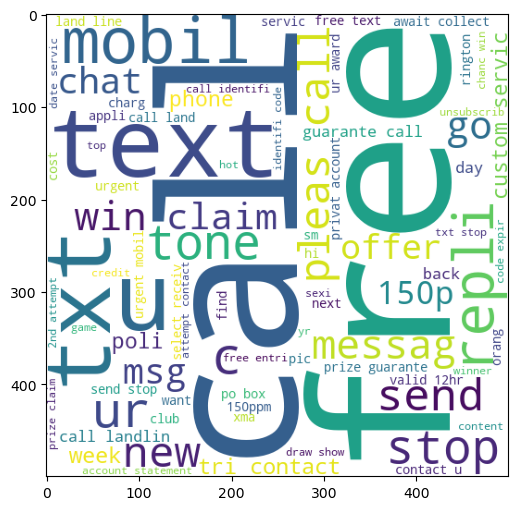

In [21]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df1[df1['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [22]:
spam_corpus = []
for msg in df1[df1['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

ham_corpus = []
for msg in df1[df1['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
  
print(len(spam_corpus), len(ham_corpus))

9939 35394


In [23]:

X=df1['transformed_text']
y = df1['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [24]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [25]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [26]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
26/26 [==============================] - 4s 99ms/step - loss: 0.4230 - accuracy: 0.8622 - val_loss: 0.2810 - val_accuracy: 0.8924
Epoch 2/10
26/26 [==============================] - 2s 86ms/step - loss: 0.2509 - accuracy: 0.9024 - val_loss: 0.1663 - val_accuracy: 0.9299
Epoch 3/10
26/26 [==============================] - 2s 84ms/step - loss: 0.1420 - accuracy: 0.9652 - val_loss: 0.0879 - val_accuracy: 0.9746
Epoch 4/10
26/26 [==============================] - 2s 83ms/step - loss: 0.0823 - accuracy: 0.9788 - val_loss: 0.0669 - val_accuracy: 0.9770
Epoch 5/10
26/26 [==============================] - 2s 87ms/step - loss: 0.0548 - accuracy: 0.9858 - val_loss: 0.0631 - val_accuracy: 0.9843
Epoch 6/10
26/26 [==============================] - 2s 85ms/step - loss: 0.0423 - accuracy: 0.9879 - val_loss: 0.0637 - val_accuracy: 0.9807


In [27]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

33/33 [==============================] - 0s 13ms/step - loss: 0.0853 - accuracy: 0.9739
Test set
  Loss: 0.085
  Accuracy: 0.974
